In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./input/') :
    for filename in filenames :
        print(os.path.join(dirname, filename))

./input/mitbih_database\100.csv
./input/mitbih_database\100annotations.txt
./input/mitbih_database\101.csv
./input/mitbih_database\101annotations.txt
./input/mitbih_database\102.csv
./input/mitbih_database\102annotations.txt
./input/mitbih_database\103.csv
./input/mitbih_database\103annotations.txt
./input/mitbih_database\104.csv
./input/mitbih_database\104annotations.txt
./input/mitbih_database\105.csv
./input/mitbih_database\105annotations.txt
./input/mitbih_database\106.csv
./input/mitbih_database\106annotations.txt
./input/mitbih_database\107.csv
./input/mitbih_database\107annotations.txt
./input/mitbih_database\108.csv
./input/mitbih_database\108annotations.txt
./input/mitbih_database\109.csv
./input/mitbih_database\109annotations.txt
./input/mitbih_database\111.csv
./input/mitbih_database\111annotations.txt
./input/mitbih_database\112.csv
./input/mitbih_database\112annotations.txt
./input/mitbih_database\113.csv
./input/mitbih_database\113annotations.txt
./input/mitbih_database\1

In [2]:
# pip install tensorflow

In [3]:
# pip install keras

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import collections

%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (30, 6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

In [6]:
# Train Inputs
def get_train_inputs() :
    x = tf.constant(X_train)
    y = tf.constant(y_train)
    return x, y

# Test Inputs
def get_test_inputs() :
    x = tf.constant(X_test)
    y = tf.constant(y_test)
    return x, y

# Eval data
def get_evel_data() :
    return tf.constant(X_test)

# Plot matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues) :
    
    if normalize : 
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else :
        print("Confusion matrix, without normalization")
        
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
            

In [7]:
path = './input/mitbih_database/'
window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

In [8]:
# Read files
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt 
records = list()
annotations = list()
filenames.sort()

In [9]:
# segrefating filenames and annotations
for f in filenames :
    filename, file_extension = os.path.splitext(f)
    
    # *.csv
    if(file_extension == '.csv') :
        records.append(path + filename + file_extension)
        
    # *.txt
    else :
        annotations.append(path + filename + file_extension)

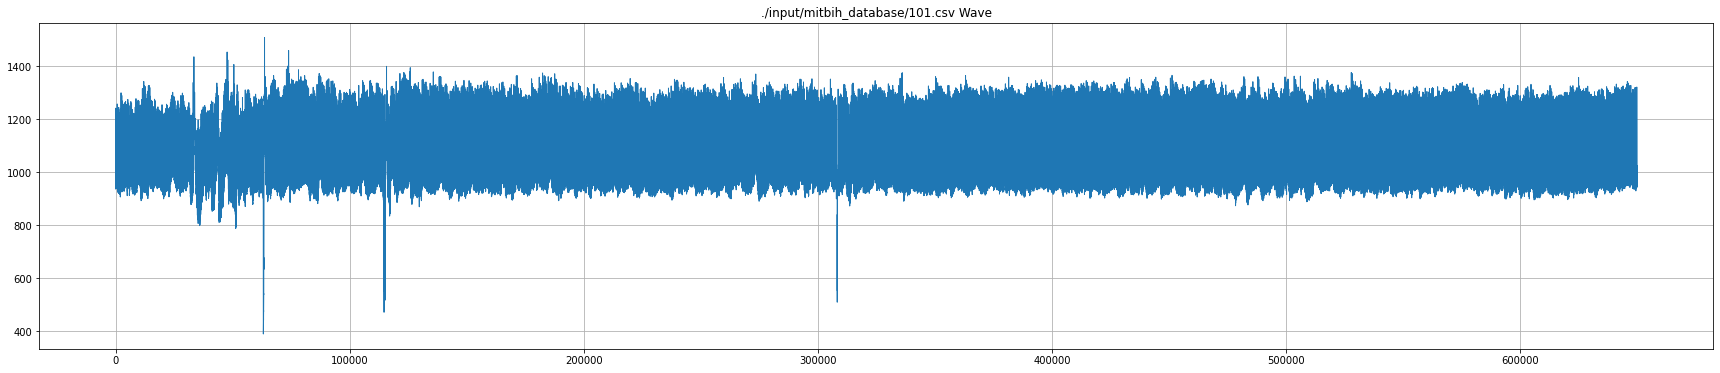

In [10]:
# Records
for r in range(0,len(records)):
# for r in range(2, 3):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    if r is 1:
        # Plot each patient's signal
        plt.title(records[1] + " Wave")
        plt.plot(signals)
        plt.show()

    # Read anotations: R position and Arrhythmia class
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
                    pass
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        y.append(arrhythmia_index)

0


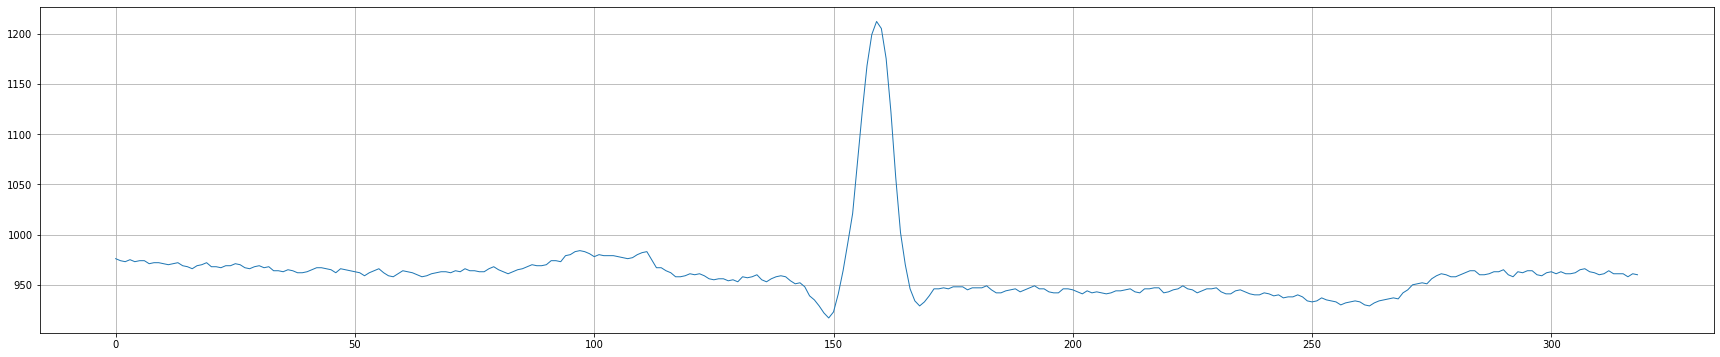

In [11]:
# plotting beat
plt.plot(X[0])
print(y[0])

In [12]:
for i in range(0,len(X)):
        X[i].append(y[i])

print(np.shape(X))

(42021, 320)


0    9997
1    8071
2    7255
4    7129
5    7023
3    2546
Name: 319, dtype: int64


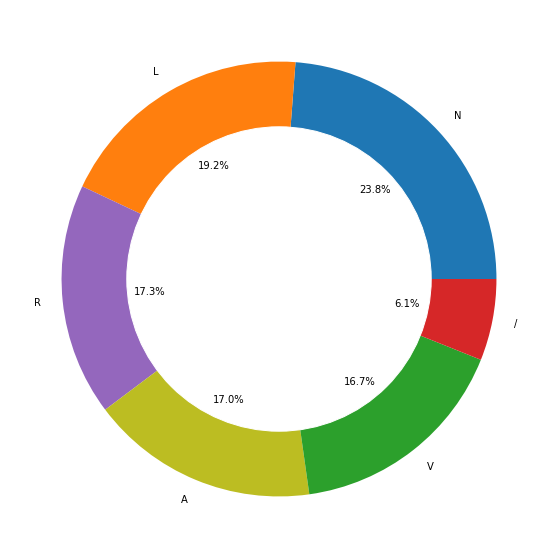

In [13]:
# representation of classes % wise
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
# plot_percentage()
from sklearn.utils import resample

df_1=X_train_df[X_train_df[319]==1]
df_2=X_train_df[X_train_df[319]==2]
df_3=X_train_df[X_train_df[319]==3]
df_4=X_train_df[X_train_df[319]==4]
df_5=X_train_df[X_train_df[319]==5]
df_0=(X_train_df[X_train_df[319]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])

5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 319, dtype: int64


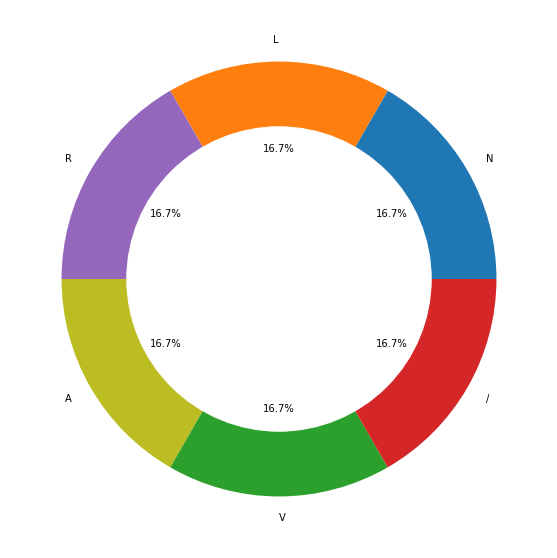

In [15]:
per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
# Train Test Split
train, test = train_test_split(X_train_df, test_size = 0.20)

print("X_train : ", len(train))
print("X_test : ", len(test))

X_train :  24000
X_test :  6000


In [17]:
target_train = train[train.shape[1] - 1]
target_test = test[test.shape[1] - 1]
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
print(np.shape(y_train), np.shape(y_test))

(24000, 6) (6000, 6)


In [18]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(X_train))

(24000, 319, 1)


In [19]:
X_train.shape[1]

319

In [20]:
# Network
def network(X_train, y_train, X_test, y_test) :
    im_shape = (X_train.shape[1], 1)
    
    inputs_cnn = Input(shape = (im_shape), name = 'inputs_cnn')
    # convolutional layer 1
    conv1_1 = Convolution1D(64, (6), activation = 'elu', input_shape = im_shape)(inputs_cnn)
    conv1_1 = BatchNormalization()(conv1_1)
    # pooling layer 1
    pool1 = MaxPool1D(pool_size = (3), strides = (2), padding = "same")(conv1_1)
    # convolutional layer 2
    conv2_1 = Convolution1D(128, (3), activation = 'elu', input_shape = im_shape)(pool1)
    conv2_1 = BatchNormalization()(conv2_1)
    # convolutional layer 3
    conv3_1 = Convolution1D(128, (3), activation = 'elu', input_shape = im_shape)(conv2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    # pooling layer 2
    pool2 = MaxPool1D(pool_size = (2), strides = (2), padding = 'same')(conv3_1)
    # convolutional layer 4
    conv4_1 = Convolution1D(256, (3), activation = 'elu', input_shape = im_shape)(pool2)
    conv4_1 = BatchNormalization()(conv4_1)
    # convolution layer 5
    conv5_1 = Convolution1D(256, (3), activation = 'elu', input_shape = im_shape)(conv4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    # pooling layer 3
    pool3 = MaxPool1D(pool_size = (2), strides = (2), padding = "same")(conv5_1)
    # flattened layer 1
    flatten = Flatten()(pool3)
    # dense layer
    dense_end1 = Dense(1024, activation = 'elu')(flatten)
    
    main_output = Dense(6, activation = 'softmax', name = 'main_output')(dense_end1)
    
    model = Model(inputs = inputs_cnn, outputs = main_output)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 8), ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only = True)]
    
    history = model.fit(X_train, y_train, epochs = 2, callbacks = callbacks, batch_size = 32, validation_data = (X_test, y_test))
    model.load_weights('best_model.h5')
    return(model, history)
    

In [21]:
def evaluate_model(history, X_test, y_test, model) :
    scores = model.evaluate((X_test), y_test, verbose = 0)
    print("Accuracy : %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_name = ['0', '1', '2', '3', '4', '5']
    
    y_true = []
    for element in y_test :
        y_true.append(np.argmax(element))
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis = 1)
    cnf_matrix = confusion_matrix(y_true, prediction)  

In [22]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model, history = network(X_train, y_train, X_test, y_test)

Epoch 1/2
750/750 [==============================] - 135s 180ms/step - loss: 0.3255 - accuracy: 0.9563 - val_loss: 0.0897 - val_accuracy: 0.9803
Epoch 2/2
750/750 [==============================] - 140s 187ms/step - loss: 0.0858 - accuracy: 0.9818 - val_loss: 0.0863 - val_accuracy: 0.9823


Accuracy : 98.23%


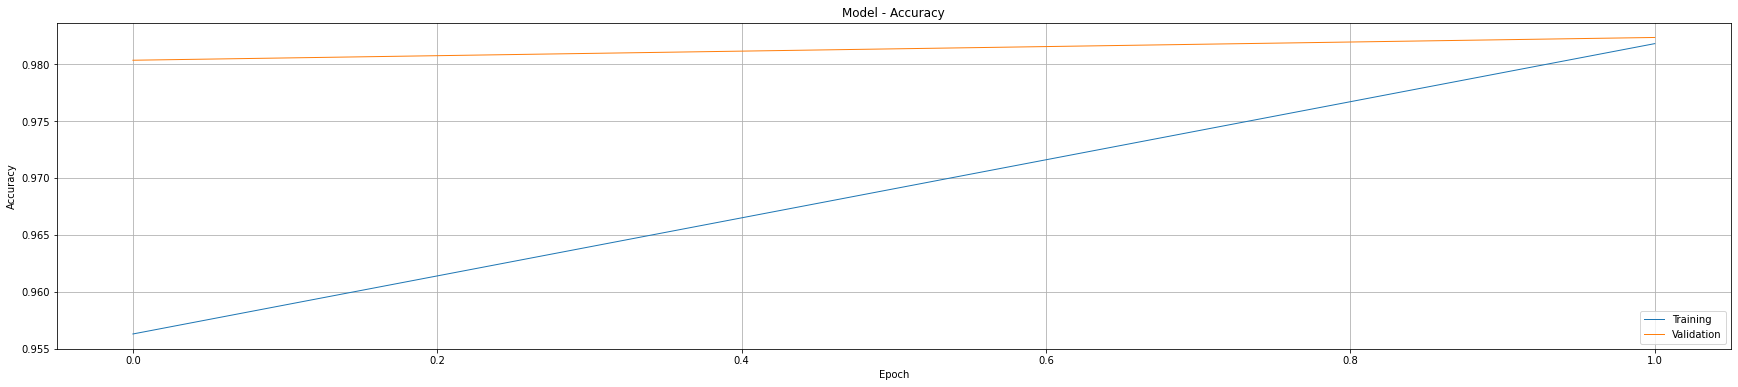

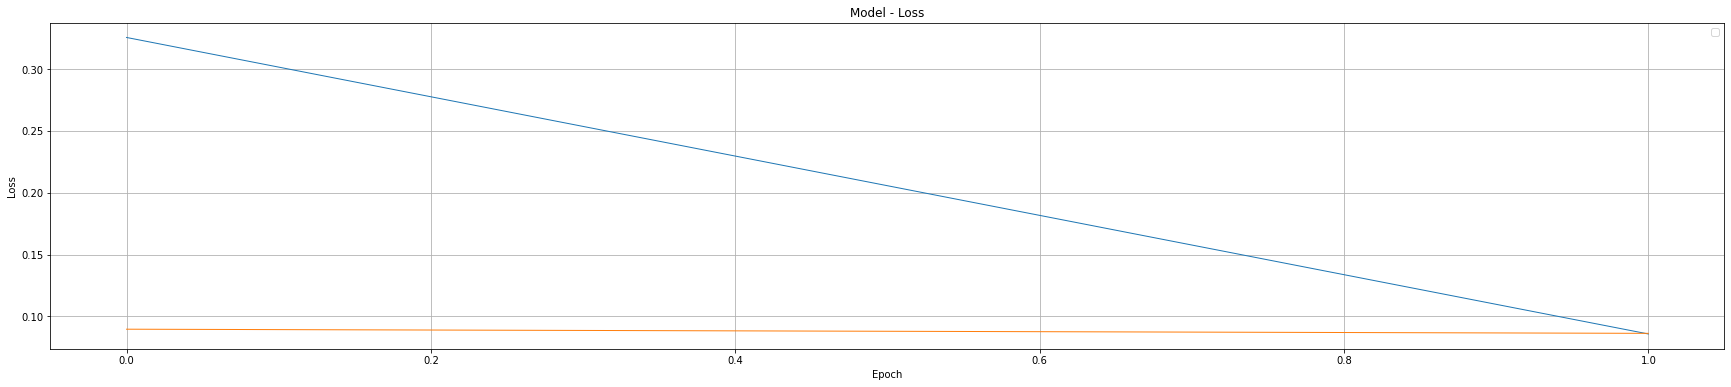

In [23]:
evaluate_model(history, X_test, y_test, model)
y_pred = model.predict(X_test)

In [27]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues) :
    if normalize :
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else : 
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.xlabel('True label')
        plt.ylabel('Predicted label')
        
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))
    np.set_printoptions(precision = 2)
    
    # Plot non-normalized confusion matrix
    plt.figure(figsize = (10, 10))
    plt_confusion_matrix(cnf_matrix, classes = ['N', 'L', 'R', 'A', 'V', '/'], normalize = True, title = 'Confusion matrix, with normalization')
    plt.show()

In [25]:
data = pd.read_csv('./input/mitbih_database/100.csv')

In [26]:
data

,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011
...,...,...,...
649995,649995,1009,928
649996,649996,935,942
649997,649997,889,951
649998,649998,871,957
